In [3]:
#Step #1 - Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Step #2A - Importing Data
start = '2020-03-17'
end = '2020-09-11'
asset = get_pricing('SPY', fields='price', start_date=start, end_date=end)
z = asset[:len(asset)]
x=range(1,len(z.index)+1)

In [5]:
df = pd.DataFrame({'Number':x, 'Pricing': z}, columns=['Number', 'Pricing'])
print(df.head())

                           Number  Pricing
2020-03-17 00:00:00+00:00       1  251.601
2020-03-18 00:00:00+00:00       2  238.555
2020-03-19 00:00:00+00:00       3  238.704
2020-03-20 00:00:00+00:00       4  227.947
2020-03-23 00:00:00+00:00       5  221.535


In [6]:
from quantopian.pipeline import Pipeline, CustomFactor
from quantopian.pipeline.data.factset import Fundamentals
from quantopian.pipeline.data import EquityPricing
from quantopian.research import run_pipeline
import matplotlib.pyplot as plt
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.morningstar import Fundamentals
from quantopian.pipeline.domain import US_EQUITIES
from quantopian.research import run_pipeline


#Step 3 - Create All of Our Functions
def xbar(self):
    x_bar = sum(self)/len(self)
    return x_bar

def ybar(self):    
    y_bar = sum(self)/len(self)
    return y_bar

def Sxx(self):
    calc1 = []
    for z in x:
        i = z-1
        calc1.append(self[i]**2)
    calc_xi = sum(calc1)
    calc_2 = sum(self)**2/len(self)
    S_xx =  calc_xi - calc_2
    return S_xx

def Sxy(xi, yi):
    sum_xy = []
    for z in x:
        i = z-1
        sum_xy.append(xi[i]*yi[i])
    calc1 = sum(sum_xy)
    
    sum_xi = sum(xi)
    sum_yi = sum(yi)
    S_xy = calc1 - sum_xi*sum_yi/len(xi)
    return S_xy

def B0_B1(x_bar, y_bar, S_xx, S_xy):
    B_1 = S_xy/S_xx
    B_0 = y_bar-B_1*x_bar
    return B_0, B_1

#Step 4 - Linear Regression Plot
def lin_regression_plot(hydrocarbon_level, purity_percent, B0, B1):
    x_lower = np.int(round(min(hydrocarbon_level)*100))
    x_upper = np.int(round(max(hydrocarbon_level)*100))
    x_range = range(x_lower, x_upper)
    myInt = 100
    x_range2 = [x / myInt for x in x_range] 
    y_range = []
    for item in x_range2:
        y = B0 + B1*item
        y_range.append(y)
    plt.plot(x_range2,y_range, label='lin regress', color='r')
    plt.scatter(hydrocarbon_level, purity_percent, label='points')
    plt.legend(loc='upper left')
    plt.title('Simple Linear Regression')
    
#altered variable to avoid global scope
def variance(xi, yi, B0, B1_, sxy_):
    SS_e = []
    for z in x:
        i = z-1 
        yh = B0 + B1*xi[i]
        SS_e.append((yi[i]-yh)**2)       
        SS_E = sum(SS_e) #residual error
        variance = SS_E/(len(yi)-2)
#    return SS_E, variance
    return SS_E, variance

#Step #6 - Prediction
#parameters x_extend = percent written between 0 and 1
def lin_regression_prediction(x_var, y_var, B0, B1, x_extend):
    x_lower = np.int(round(min(x_var)*100))
    x_upper = np.int(round(max(x_var)*100))
    x_range = range(x_lower, x_upper)
    
    myInt = 100
    #list comprehension cannot iterate over decimals
    x_range2 = [x / myInt for x in x_range] 
    y_range = []
    for item in x_range2:
        y = B0 + B1*item
        y_range.append(y)    
    
    x_pred_lower = x_upper
    x_pred_upper = np.int(((x_upper - x_lower)* x_extend)+x_pred_lower)
    x_range_predicted = range(x_pred_lower, x_pred_upper)
    
    #list comprehension cannot iterate over decimals, divide each entry by 100
    x_range_predicted_2 = [z / myInt for z in x_range_predicted] 
    y_range_predicted = []
    for item in x_range_predicted_2:
        y = B0 + B1*item
        y_range_predicted.append(y)    
    
    plt.plot(x_range2,y_range, label='lin regress', color='r')
    plt.plot(x_range_predicted_2, y_range_predicted, label='prediction', color='b' )
    plt.scatter(x_var, y_var, label='points')
    plt.legend(loc='upper left')
    plt.title('Simple Linear Regression')

In [7]:
x_bar = xbar(x)
y_bar = ybar(z)
S_xx = Sxx(x)
S_xy = Sxy(x, z)
B0,B1 = B0_B1(x_bar, y_bar, S_xx, S_xy)
#Returns sum of errors, and variance
SSE, sigma_var = variance(x, z, B0, B1, S_xy)

In [8]:
#Step #5 - Create Our TearSheet
print 'Beta_0 ----- {}: '.format(B0)
print 'Beta_1 (slope) ----- {}: '.format(B1)
print 'x_bar (Arithmetic Mean)----- {}'.format(x_bar)
print 'y_bar (Arithmetic Mean)----- {}'.format(y_bar)
print 'SSE (Sum of Squares)----- {}'.format(SSE)
print 'Sigma (Variance) ----- {}'.format(sigma_var)

Beta_0 ----- 253.57190296774195: 
Beta_1 (slope) ----- 0.7952897941628256: 
x_bar (Arithmetic Mean)----- 63.0
y_bar (Arithmetic Mean)----- 303.67515999999995
SSE (Sum of Squares)----- 9599.85291494811
Sigma (Variance) ----- 78.04758467437487


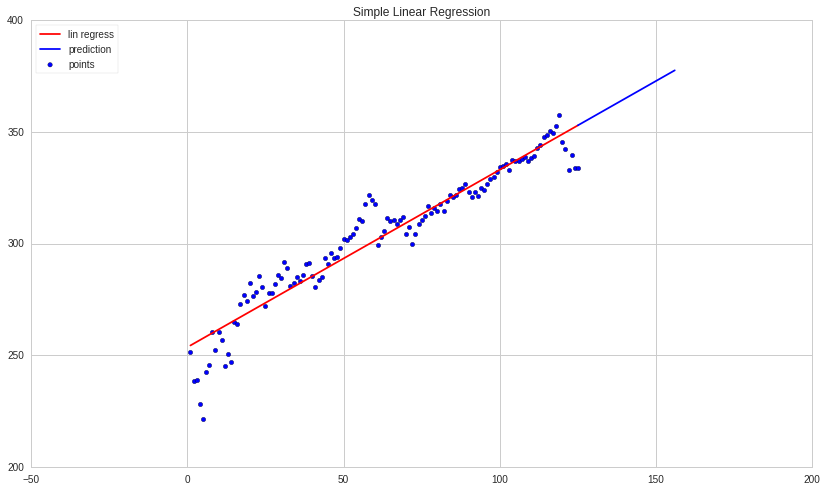

In [9]:
lin_regression_prediction(x, z, B0, B1, 0.25)